https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [8]:
import pandas as pd
df=pd.read_csv("data/temps.csv")
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [10]:
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [12]:
df['week'] = df.week.map({"Mon":1,"Tues":2,"Wed":3,"Thurs":4,"Fri":5,"Sat":6,"Sun":7})
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,5,45,45,45.6,45,43,50,44,29
1,2016,1,2,6,44,45,45.7,44,41,50,44,61
2,2016,1,3,7,45,44,45.8,41,43,46,47,56
3,2016,1,4,1,44,41,45.9,40,44,48,46,53
4,2016,1,5,2,41,40,46.0,44,46,46,46,41


### 3. Divide en train y test

In [16]:
X=df[["year","month","day","week","temp_2","temp_1","average","forecast_noaa","forecast_acc","forecast_under","friend"]]
y=df["actual"]

In [14]:
df.keys()

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [18]:
from sklearn.tree import DecisionTreeRegressor


In [20]:
tree = DecisionTreeRegressor(max_depth=3, random_state=0, min_samples_leaf=20)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=20, random_state=0)

In [21]:
tree_prediction=tree.predict(X_test)
tree_prediction

array([50.62162162, 56.79245283, 61.04761905, 56.79245283, 56.79245283,
       72.42857143, 78.19444444, 66.26315789, 61.04761905, 66.26315789,
       43.16666667, 56.79245283, 78.19444444, 66.26315789, 61.04761905,
       66.26315789, 66.26315789, 50.62162162, 72.42857143, 72.42857143,
       66.26315789, 61.04761905, 56.79245283, 61.04761905, 72.42857143,
       50.62162162, 50.62162162, 72.42857143, 56.79245283, 78.19444444,
       56.79245283, 56.79245283, 56.79245283, 66.26315789, 56.79245283,
       61.04761905, 43.16666667, 72.42857143, 56.79245283, 50.62162162,
       61.04761905, 72.42857143, 66.26315789, 78.19444444, 78.19444444,
       61.04761905, 61.04761905, 61.04761905, 72.42857143, 61.04761905,
       66.26315789, 50.62162162, 56.79245283, 43.16666667, 56.79245283,
       78.19444444, 78.19444444, 56.79245283, 56.79245283, 56.79245283,
       78.19444444, 72.42857143, 56.79245283, 56.79245283, 66.26315789,
       78.19444444, 66.26315789, 78.19444444, 72.42857143, 56.79

In [23]:
tree_prediction_train = tree.predict(X_train)
tree_prediction_train

array([66.26315789, 72.42857143, 56.79245283, 50.62162162, 72.42857143,
       66.26315789, 56.79245283, 56.79245283, 78.19444444, 72.42857143,
       66.26315789, 78.19444444, 50.62162162, 50.62162162, 78.19444444,
       78.19444444, 66.26315789, 78.19444444, 56.79245283, 66.26315789,
       50.62162162, 72.42857143, 43.16666667, 61.04761905, 43.16666667,
       50.62162162, 66.26315789, 66.26315789, 61.04761905, 72.42857143,
       72.42857143, 66.26315789, 56.79245283, 61.04761905, 56.79245283,
       66.26315789, 56.79245283, 66.26315789, 56.79245283, 43.16666667,
       66.26315789, 50.62162162, 72.42857143, 72.42857143, 66.26315789,
       61.04761905, 78.19444444, 72.42857143, 66.26315789, 72.42857143,
       56.79245283, 43.16666667, 50.62162162, 43.16666667, 50.62162162,
       50.62162162, 78.19444444, 61.04761905, 61.04761905, 78.19444444,
       66.26315789, 43.16666667, 72.42857143, 78.19444444, 78.19444444,
       56.79245283, 50.62162162, 72.42857143, 56.79245283, 66.26

### 5. Calcula su MAE
Sin usar sklearn

In [27]:
import numpy as np

def mae_hm(y_test, tree_prediction):
    return np.mean(np.abs(y_test - tree_prediction))

print(f"MAE Train: {mae_hm(y_train, tree_prediction_train):.2f}")
print(f"MAE Test: {mae_hm(y_test, tree_prediction):.2f}")

MAE Train: 3.73
MAE Test: 3.97


### 6. Calcula su MAPE
Sin usar sklearn

In [43]:
def mape_hm(y_test, tree_prediction):
    return np.mean(np.abs(y_test - tree_prediction)/y_test)*100

print(f"MAPE Train: {mape_hm(y_train, tree_prediction_train):.2f}")
print(f"MAPE Test: {mape_hm(y_test, tree_prediction):.2f}")


MAPE Train: 6.07
MAPE Test: 6.38


### 7. Representa el árbol de decision

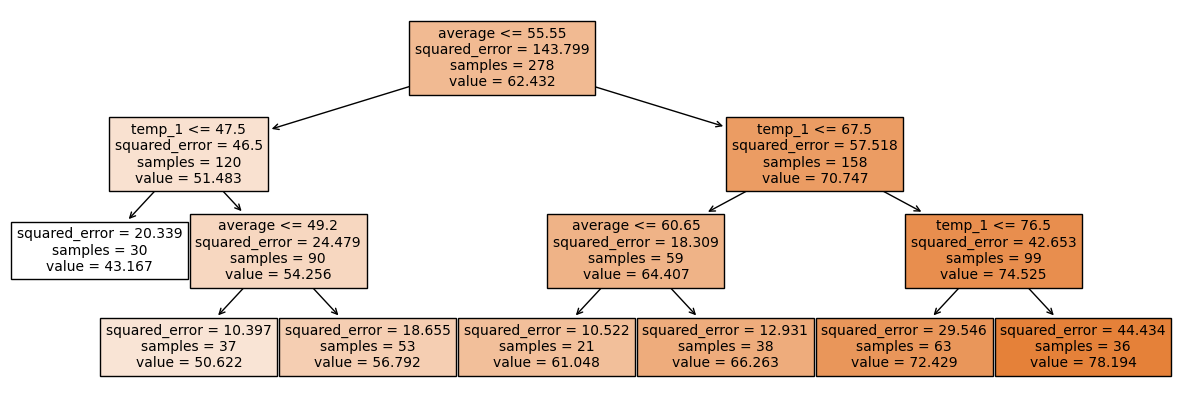

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,5))
plot_tree(tree,
               feature_names=X_train.columns,
               #class_names=y_train.actual,
               filled = True,
               fontsize=10);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

### 9. Vuelve a calcular si MAE

### 10. Vuelve a representar su árbol

### 10. Obten el `feature_importances` de cada variable en el último modelo

<AxesSubplot:>

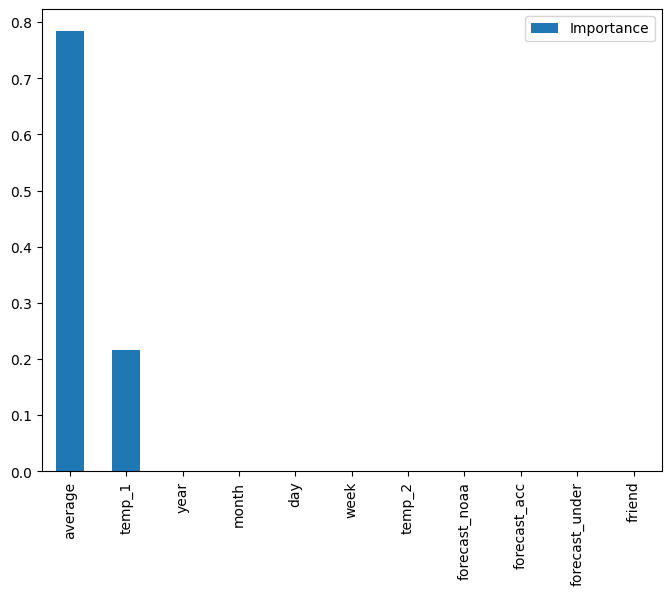

In [50]:
feat_importances = pd.DataFrame(tree.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))